<a href="https://colab.research.google.com/github/Rogerodrigues/Challenge3_TelecomX_part2/blob/main/Challenger3_TelecomX_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##🛠️Preparação dos Dados

In [11]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento e Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Ajustes visuais para os gráficos
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10, 6)


##Extração do Arquivo Tratado

In [12]:
df = pd.read_csv('/content/dados_tratados.csv')
print(df.head())

   ID_Cliente  Churn     Gênero  Idoso Parceiro Dependentes  MesesContrato  \
0  0002-ORFBO      0   Feminino      0      Yes         Yes              9   
1  0003-MKNFE      0  Masculino      0       No          No              9   
2  0004-TLHLJ      1  Masculino      0       No          No              4   
3  0011-IGKFF      1  Masculino      1      Yes          No             13   
4  0013-EXCHZ      1   Feminino      1      Yes          No              3   

  AssinaturaTelefone MultiplasLinhas AssinaturaInternet  ... StreamingTV  \
0                Yes              No                DSL  ...         Yes   
1                Yes             Yes                DSL  ...          No   
2                Yes              No        Fiber optic  ...          No   
3                Yes              No        Fiber optic  ...         Yes   
4                Yes              No        Fiber optic  ...         Yes   

  StreamingFilmes TipoContrato FaturaOnline     FormaPagamento  \
0       

##Remoção de Colunas Irrelevantes

In [13]:
# Remove a coluna 'ID_Cliente'
df.drop('ID_Cliente', axis=1, inplace=True)

# Exibe as primeiras linhas para confirmar que a coluna foi removida
print(df.head())

   Churn     Gênero  Idoso Parceiro Dependentes  MesesContrato  \
0      0   Feminino      0      Yes         Yes              9   
1      0  Masculino      0       No          No              9   
2      1  Masculino      0       No          No              4   
3      1  Masculino      1      Yes          No             13   
4      1   Feminino      1      Yes          No              3   

  AssinaturaTelefone MultiplasLinhas AssinaturaInternet SegurancaOnline  ...  \
0                Yes              No                DSL              No  ...   
1                Yes             Yes                DSL              No  ...   
2                Yes              No        Fiber optic              No  ...   
3                Yes              No        Fiber optic              No  ...   
4                Yes              No        Fiber optic              No  ...   

  StreamingTV StreamingFilmes TipoContrato FaturaOnline     FormaPagamento  \
0         Yes              No        1 ano  

In [14]:
# Renomeia o DataFrame 'df' para 'df_final'
df_final = df

# Opcional: remoção da variável antiga para evitar confusão no restante do código
del df

# Mostra as primeiras 5 linhas do novo DataFrame para confirmar
print("DataFrame renomeado para 'df_final'. As 5 primeiras linhas são:")
print(df_final.head())

DataFrame renomeado para 'df_final'. As 5 primeiras linhas são:
   Churn     Gênero  Idoso Parceiro Dependentes  MesesContrato  \
0      0   Feminino      0      Yes         Yes              9   
1      0  Masculino      0       No          No              9   
2      1  Masculino      0       No          No              4   
3      1  Masculino      1      Yes          No             13   
4      1   Feminino      1      Yes          No              3   

  AssinaturaTelefone MultiplasLinhas AssinaturaInternet SegurancaOnline  ...  \
0                Yes              No                DSL              No  ...   
1                Yes             Yes                DSL              No  ...   
2                Yes              No        Fiber optic              No  ...   
3                Yes              No        Fiber optic              No  ...   
4                Yes              No        Fiber optic              No  ...   

  StreamingTV StreamingFilmes TipoContrato FaturaOnline   

##Encoding

In [15]:
# Passo 1: Identificar automaticamente todas as colunas que contêm texto (categóricas).
colunas_categoricas = df_final.select_dtypes(include=['object']).columns

# Passo 2: Aplicar o One-Hot Encoding para converter as colunas de texto em numéricas.
# - 'columns' especifica quais colunas transformar.
# - 'drop_first=True' remove a primeira categoria de cada variável para evitar redundância.
df_encoded = pd.get_dummies(df_final, columns=colunas_categoricas, drop_first=True).astype(int)

# Passo 3: Exibir as 5 primeiras linhas do novo DataFrame para visualizar a transformação.
print("DataFrame transformado com sucesso!")
print(df_encoded.head())

# Opcional: Exibir informações para confirmar que todas as colunas são numéricas.
print("\nInformações do novo DataFrame:")
df_encoded.info()

DataFrame transformado com sucesso!
   Churn  Idoso  MesesContrato  Faturamento_Mensal  Contas_Diarias  \
0      0      0              9                  65               2   
1      0      0              9                  59               1   
2      1      0              4                  73               2   
3      1      1             13                  98               3   
4      1      1              3                  83               2   

   Gênero_Masculino  Parceiro_Yes  Dependentes_Yes  AssinaturaTelefone_Yes  \
0                 0             1                1                       1   
1                 1             0                0                       1   
2                 1             0                0                       1   
3                 1             1                0                       1   
4                 0             1                0                       1   

   MultiplasLinhas_No phone service  ...  FaturamentoTotal_996.85  \
0    

##Verificação de Proporção de Evasão

Análise da Proporção de Churn de Clientes
---------------------------------------------
Contagem de clientes:
   - Permaneceram (0): 5174
   - Evadiram (1):     1869

Proporção de clientes:
   - Permaneceram (0): 73.46%
   - Evadiram (1):     26.54%
---------------------------------------------


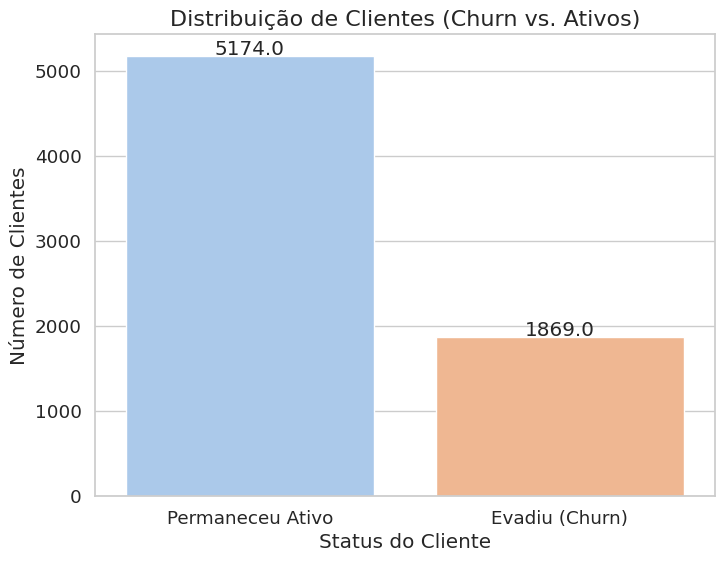

In [16]:
# Contagrm  da quantidade de clientes em cada categoria da coluna 'Churn'
# 0 = Permaneceu Ativo, 1 = Evadiu (Churn)
contagem_churn = df_encoded['Churn'].value_counts()

# Calcular a proporção (porcentagem) de cada categoria
proporcao_churn = df_encoded['Churn'].value_counts(normalize=True) * 100

# Exibir os resultados
print("Análise da Proporção de Churn de Clientes")
print("-" * 45)
print("Contagem de clientes:")
print(f"   - Permaneceram (0): {contagem_churn[0]}")
print(f"   - Evadiram (1):     {contagem_churn[1]}")
print("\nProporção de clientes:")
print(f"   - Permaneceram (0): {proporcao_churn[0]:.2f}%")
print(f"   - Evadiram (1):     {proporcao_churn[1]:.2f}%")
print("-" * 45)




plt.figure(figsize=(8, 6))

# A função countplot retorna o objeto do eixo, que chamamos de 'ax'
ax = sns.countplot(x='Churn', data=df_encoded, palette='pastel')

plt.title('Distribuição de Clientes (Churn vs. Ativos)', fontsize=16)
plt.ylabel('Número de Clientes')
plt.xlabel('Status do Cliente')
plt.xticks(ticks=[0, 1], labels=['Permaneceu Ativo', 'Evadiu (Churn)'])


for p in ax.patches:
    # ax.annotate() é a função que escreve o texto
    # p.get_height() pega a altura da barra (que é a contagem)
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

##Balanceamento de Classes

In [17]:
# Instalar a biblioteca imbalanced-learn
!pip install imbalanced-learn

import pandas as pd
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


# Separar as variáveis independentes (X) da variável alvo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# --- Verificação do Desbalanceamento Original ---
print("="*50)
print("Distribuição das classes ANTES do balanceamento:")
print(y.value_counts())
print("="*50)


# --- Aplicação do SMOTE (Oversampling) ---

# Criar o objeto SMOTE.
smote = SMOTE(random_state=42)

# Aplicar o SMOTE para gerar os novos dados balanceados.
X_resampled, y_resampled = smote.fit_resample(X, y)


# --- Verificação do Resultado Pós-Balanceamento ---

print("\nDistribuição das classes DEPOIS do balanceamento com SMOTE:")
print(y_resampled.value_counts())
print("="*50)
print("\nO dataset foi balanceado com sucesso!")
print(f"O novo conjunto de dados agora tem {len(X_resampled)} amostras, com ambas as classes representadas igualmente.")

Distribuição das classes ANTES do balanceamento:
Churn
0    5174
1    1869
Name: count, dtype: int64

Distribuição das classes DEPOIS do balanceamento com SMOTE:
Churn
0    5174
1    5174
Name: count, dtype: int64

O dataset foi balanceado com sucesso!
O novo conjunto de dados agora tem 10348 amostras, com ambas as classes representadas igualmente.


##Padronização (Standardization)

In [18]:
# Instalar a biblioteca imbalanced-learn
!pip install imbalanced-learn

# Importar a biblioteca necessária
from imblearn.over_sampling import SMOTE

# --- Balanceamento dos Dados com SMOTE ---
print("Aplicando SMOTE para balancear as classes...")
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Balanceamento concluído. Nova distribuição das classes:")
print(y_resampled.value_counts())
print("-" * 50)

# --- Padronização dos Dados ---
print("Aplicando padronização (StandardScaler)...")
scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_resampled)
X_scaled = pd.DataFrame(X_scaled_array, columns=X_resampled.columns)
print("Padronização concluída.")
print("-" * 50)


# --- Verificação Final ---
print("\nProcesso finalizado! As 5 primeiras linhas do DataFrame final são:")
print(X_scaled.head())

print("\nEstatísticas descritivas para confirmar a padronização (média ~0, desvio padrão ~1):")
print(X_scaled.describe())

Aplicando SMOTE para balancear as classes...
Balanceamento concluído. Nova distribuição das classes:
Churn
0    5174
1    5174
Name: count, dtype: int64
--------------------------------------------------
Aplicando padronização (StandardScaler)...
Padronização concluída.
--------------------------------------------------

Processo finalizado! As 5 primeiras linhas do DataFrame final são:
      Idoso  MesesContrato  Faturamento_Mensal  Contas_Diarias  \
0 -0.408041      -0.777569           -0.082133        0.272246   
1 -0.408041      -0.777569           -0.289996       -0.674712   
2 -0.408041      -0.985456            0.195017        0.272246   
3  2.450733      -0.611259            1.061110        1.219204   
4  2.450733      -1.027034            0.541454        0.272246   

   Gênero_Masculino  Parceiro_Yes  Dependentes_Yes  AssinaturaTelefone_Yes  \
0         -0.898792      1.263105         1.881116                0.329238   
1          1.112605     -0.791700        -0.531599       

##🎯 Correlação e Seleção de Variáveis

Variáveis com MAIOR correlação com Churn (Positiva e Negativa):

Status_Cliente_Saiu                   1.000000
TipoContrato_Mensal                   0.405103
AssinaturaInternet_Fiber optic        0.308020
FormaPagamento_Cheque Eletrônico      0.301919
Contas_Diarias                        0.196095
                                        ...   
BackupOnline_No internet service     -0.227890
SuporteTecnico_No internet service   -0.227890
TipoContrato_2 anos                  -0.302253
MesesContrato                        -0.352229
Idade_Churn_Menor que 65 anos        -1.000000
Name: Churn, Length: 6562, dtype: float64


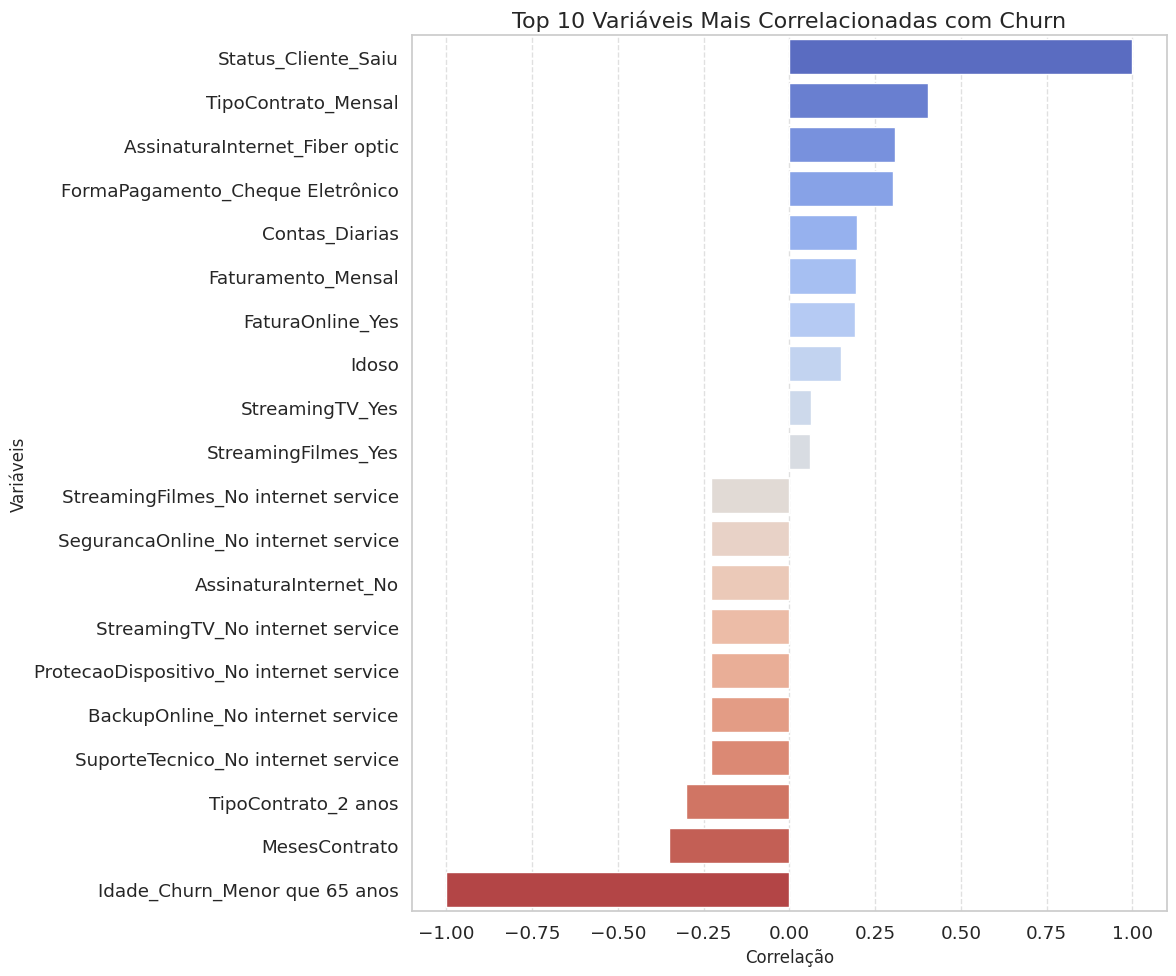

In [19]:
# --- Cálculo e Análise da Correlação ---

# 1. Calcular a matriz de correlação completa
correlation_matrix = df_encoded.corr()

# 2. Isolar a correlação de todas as variáveis com a coluna 'Churn'
corr_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)

# 3. Remover a correlação de 'Churn' com ela mesma (que é sempre 1)
corr_with_churn = corr_with_churn.drop('Churn')


# --- Exibição dos Resultados ---

print("Variáveis com MAIOR correlação com Churn (Positiva e Negativa):\n")
print(corr_with_churn)


# --- Visualização Gráfica ---

# Selecionar as 10 maiores e 10 menores correlações para visualização
top_corr = pd.concat([corr_with_churn.head(10), corr_with_churn.tail(10)])

plt.figure(figsize=(12, 10))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='coolwarm')
plt.title('Top 10 Variáveis Mais Correlacionadas com Churn', fontsize=16)
plt.xlabel('Correlação', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('churn_correlation.png')

##Análise e Interpretação

Principais Fatores que AUMENTAM a Chance de Churn (Correlação Positiva):

1.TipoContrato_Mensal: Esta é, de longe, a variável com a maior correlação positiva. Indica que clientes com contratos mensais são muito mais propensos a cancelar. Isso faz sentido, pois eles não possuem um vínculo de longo prazo.

2.AssinaturaInternet_Fiber optic: Clientes com fibra ótica têm uma maior tendência a cancelar. Isso pode parecer contraintuitivo, mas pode indicar problemas de serviço, preço ou concorrência agressiva nesse segmento.

3.FaturaOnline_Yes: Clientes que recebem fatura online têm uma leve tendência a cancelar.

4.FormaPagamento_Cheque Eletrônico: O uso de cheque eletrônico também está positivamente correlacionado com o churn.

Principais Fatores que DIMINUEM a Chance de Churn (Correlação Negativa):

1.MesesContrato: Quanto maior o número de meses de contrato (cliente mais antigo), menor a chance de cancelamento. Este é o fator de retenção mais forte.

2.TipoContrato_2 anos: Clientes com contratos de 2 anos são os menos propensos a sair, o que é esperado devido à fidelidade contratual.

3.SegurancaOnline_No internet service e SuporteTecnico_No internet service: Estes são artefatos da codificação. Eles indicam que clientes sem serviço de internet (que só têm telefonia, por exemplo) têm uma taxa de churn muito baixa.

4.Idoso (0 ou 1): A correlação negativa com "Idoso" indica que clientes mais jovens (Idoso=0) têm uma menor probabilidade de sair.

##Análises Direcionadas

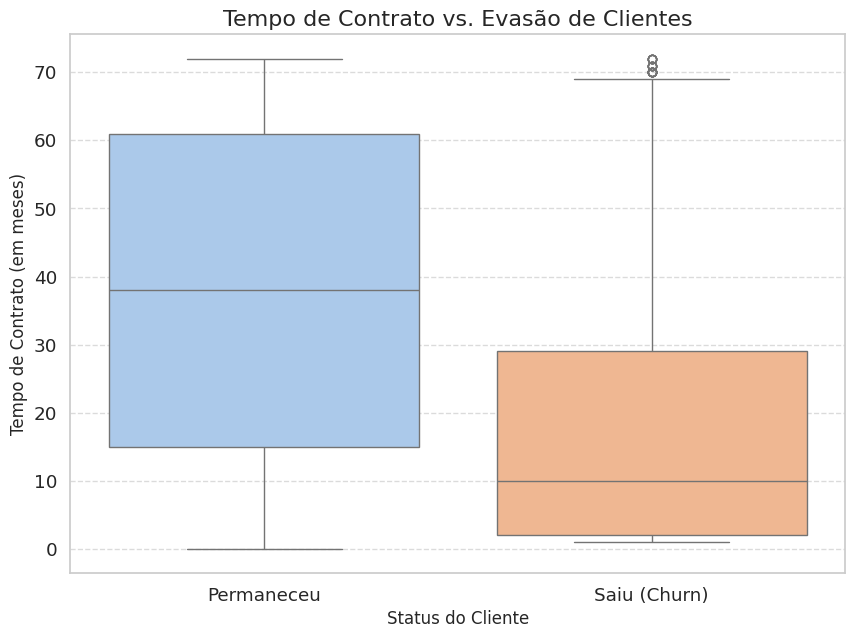

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados originais do CSV
df = pd.read_csv('dados_tratados.csv')

# Garantir que 'FaturamentoTotal' seja um tipo numérico
df['FaturamentoTotal'] = pd.to_numeric(df['FaturamentoTotal'], errors='coerce')

# Criar uma coluna com rótulos descritivos para os gráficos
df['Status do Cliente'] = df['Churn'].map({0: 'Permaneceu', 1: 'Saiu (Churn)'})

# --- Gráfico 1: Tempo de Contrato vs. Evasão ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Status do Cliente', y='MesesContrato', data=df, palette='pastel', order=['Permaneceu', 'Saiu (Churn)'])
plt.title('Tempo de Contrato vs. Evasão de Clientes', fontsize=16)
plt.ylabel('Tempo de Contrato (em meses)', fontsize=12)
plt.xlabel('Status do Cliente', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('contrato_vs_churn.png')




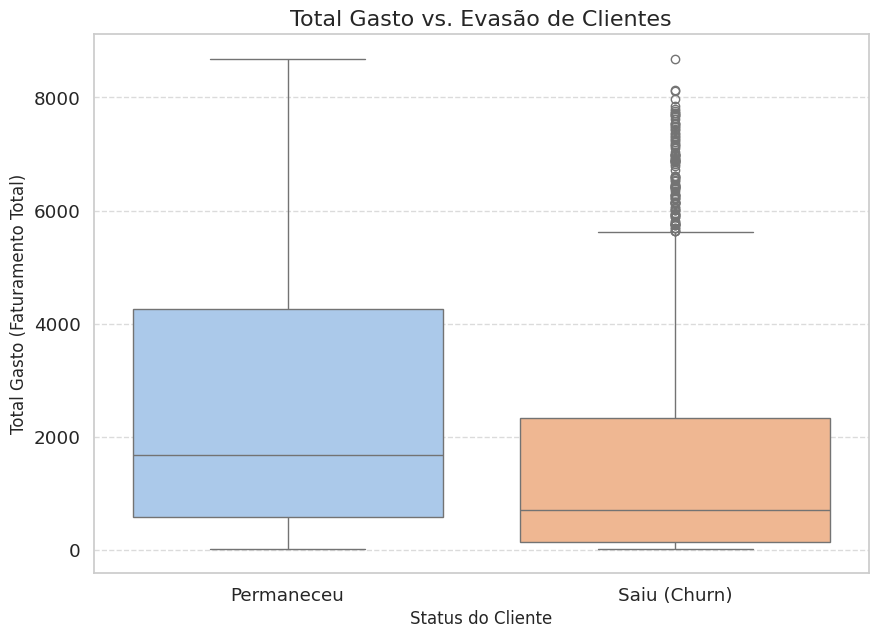

In [28]:
# --- Gráfico 2: Total Gasto vs. Evasão ---
plt.figure(figsize=(10, 7))
sns.boxplot(x='Status do Cliente', y='FaturamentoTotal', data=df, palette='pastel', order=['Permaneceu', 'Saiu (Churn)'])
plt.title('Total Gasto vs. Evasão de Clientes', fontsize=16)
plt.ylabel('Total Gasto (Faturamento Total)', fontsize=12)
plt.xlabel('Status do Cliente', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('gasto_vs_churn.png')



##Análise e Interpretação dos Gráficos

1. Tempo de Contrato vs. Evasão
Este gráfico compara a distribuição do tempo de contrato (em meses) para os clientes que permaneceram e para os que saíram.



Análise e Tendências:

Padrão Claro: A diferença entre os dois grupos é muito nítida. O "boxplot" (a caixa) dos clientes que saíram está concentrado inteiramente na parte inferior do gráfico.

Clientes que Saem: Metade desses clientes (o corpo da caixa) cancelou com menos de 30 meses de serviço, com a mediana (a linha central) ficando em torno de apenas 10 meses. Isso indica que o maior risco de evasão está nos primeiros anos do cliente.

Clientes que Ficam: Em contraste, a mediana de tempo de contrato para clientes que permaneceram é significativamente mais alta, próxima de 40 meses. A lealdade aumenta drasticamente com o tempo.

2. Total Gasto vs. Evasão
Este gráfico compara o faturamento total acumulado dos clientes que ficaram versus os que saíram.



Análise e Tendências:

Relação com o Tempo: O padrão aqui é um reflexo direto do gráfico anterior. Como os clientes que saem têm um tempo de contrato menor, é natural que seu gasto total acumulado também seja muito inferior.

Valores Medianos: A mediana do faturamento total para clientes que saíram é visivelmente mais baixa do que para os que permaneceram.

Conclusão: Embora o "Total Gasto" seja um diferenciador, ele é mais um sintoma do que uma causa raiz. A variável mais influente continua sendo o Tempo de Contrato.

Essas visualizações confirmam de forma poderosa que a duração do relacionamento com o cliente é um dos fatores mais críticos na previsão da evasão.

##🤖 Modelagem Preditiva

##Separação de Dados

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# --- Divisão em Treino e Teste ---
print("Dividindo os dados em conjuntos de treino e teste (70/30)...")

# test_size=0.3 define que 30% dos dados serão para teste.
# random_state=42 garante que a divisão seja sempre a mesma.
# stratify=y_resampled garante que a proporção de Churn seja igual nos dois conjuntos.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_resampled
)
print("Divisão concluída!")
print("-" * 50)


# --- Verificação da Divisão ---
print("Verificando os resultados da divisão:\n")
print(f"Dimensões do X de Treino: {X_train.shape}")
print(f"Dimensões do X de Teste:  {X_test.shape}")
print(f"Dimensões do y de Treino: {y_train.shape}")
print(f"Dimensões do y de Teste:  {y_test.shape}")
print("-" * 50)

print("\nVerificando a proporção de classes no conjunto de Treino:")
print(y_train.value_counts())
print("\nVerificando a proporção de classes no conjunto de Teste:")
print(y_test.value_counts())
print("-" * 50)


Dividindo os dados em conjuntos de treino e teste (70/30)...
Divisão concluída!
--------------------------------------------------
Verificando os resultados da divisão:

Dimensões do X de Treino: (7243, 6562)
Dimensões do X de Teste:  (3105, 6562)
Dimensões do y de Treino: (7243,)
Dimensões do y de Teste:  (3105,)
--------------------------------------------------

Verificando a proporção de classes no conjunto de Treino:
Churn
1    3622
0    3621
Name: count, dtype: int64

Verificando a proporção de classes no conjunto de Teste:
Churn
0    1553
1    1552
Name: count, dtype: int64
--------------------------------------------------


## Criação de Modelos

Iniciando o pré-processamento dos dados...
Dados balanceados com SMOTE.
--------------------------------------------------
Dados divididos em treino (70%) e teste (30%).
--------------------------------------------------
Dados de treino e teste padronizados para a Regressão Logística.
--------------------------------------------------
Treinando o modelo de Regressão Logística...
Treinamento concluído.
--------------------------------------------------
Treinando o modelo Random Forest...
Treinamento concluído.
--------------------------------------------------

AVALIAÇÃO DO MODELO: REGRESSÃO LOGÍSTICA
              precision    recall  f1-score   support

  Permaneceu       1.00      1.00      1.00      1553
Saiu (Churn)       1.00      1.00      1.00      1552

    accuracy                           1.00      3105
   macro avg       1.00      1.00      1.00      3105
weighted avg       1.00      1.00      1.00      3105


AVALIAÇÃO DO MODELO: RANDOM FOREST
              precision    re

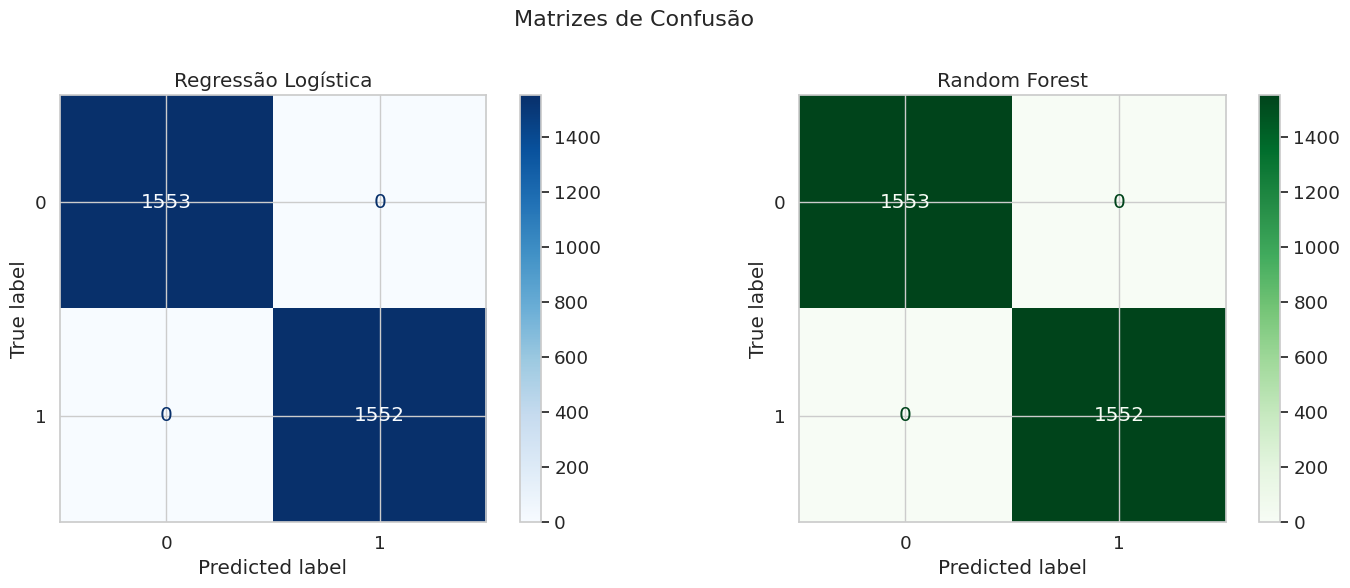

In [22]:
#Importar todas as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

# --- Preparação dos Dados (Codificação e Balanceamento) ---
print("Iniciando o pré-processamento dos dados...")
df = pd.read_csv('dados_tratados.csv')
df.drop('ID_Cliente', axis=1, inplace=True)
colunas_categoricas = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True).astype(int)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Dados balanceados com SMOTE.")
print("-" * 50)

# --- Divisão em Treino e Teste (ANTES de padronizar) ---
# Usaremos a mesma divisão para ambos os modelos para uma comparação justa
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_resampled
)
print("Dados divididos em treino (70%) e teste (30%).")
print("-" * 50)

# --- Padronização (APENAS para a Regressão Logística) ---
scaler = StandardScaler()
# Aprende a escala APENAS com os dados de treino
scaler.fit(X_train)
# Transforma os dados de treino e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Dados de treino e teste padronizados para a Regressão Logística.")
print("-" * 50)

# --- Treinamento do Modelo 1: Regressão Logística ---
print("Treinando o modelo de Regressão Logística...")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("Treinamento concluído.")
print("-" * 50)

# --- Treinamento do Modelo 2: Random Forest ---
print("Treinando o modelo Random Forest...")
# Note que usamos os dados NÃO padronizados: X_train, X_test
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
print("Treinamento concluído.")
print("-" * 50)


# --- Avaliação dos Modelos ---

# 1. Previsões
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf_clf.predict(X_test)

# 2. Relatórios de Classificação
print("\nAVALIAÇÃO DO MODELO: REGRESSÃO LOGÍSTICA")
print(classification_report(y_test, y_pred_log_reg, target_names=['Permaneceu', 'Saiu (Churn)']))

print("\nAVALIAÇÃO DO MODELO: RANDOM FOREST")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneceu', 'Saiu (Churn)']))

# 3. Matrizes de Confusão
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Matrizes de Confusão', fontsize=16)

# Matriz para Regressão Logística
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title('Regressão Logística')

# Matriz para Random Forest
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, ax=axes[1], cmap='Greens')
axes[1].set_title('Random Forest')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('comparacao_matrizes_confusao.png')
print("\nGráfico com as matrizes de confusão salvo como 'comparacao_matrizes_confusao.png'")

Relatório de Classificação:

* precision: De todos os clientes que o modelo  previu que sairiam, quantos realmente saíram?

* recall (revocação): De todos os clientes que
realmente saíram, quantos o modelo conseguiu identificar corretamente? (Métrica muito importante para problemas de churn).

* f1-score: Uma média harmônica entre precision e recall. É uma ótima métrica geral do desempenho do modelo.

* accuracy (acurácia): A porcentagem geral de previsões corretas.

Matriz de Confusão:

É uma tabela visual que mostra os acertos e erros.

Verdadeiros Negativos (canto superior esquerdo): Clientes que permaneceram e o modelo previu corretamente que permaneceriam.

Falsos Positivos (canto superior direito): Clientes que permaneceram, mas o modelo previu (erroneamente) que sairiam.

Falsos Negativos (canto inferior esquerdo): Clientes que saíram, mas o modelo previu (erroneamente) que permaneceriam. Este é o erro mais caro para a empresa!

Verdadeiros Positivos (canto inferior direito): Clientes que saíram e o modelo previu corretamente que sairiam.






##Avaliação dos Modelos

Treinando o modelo de Regressão Logística...
Treinamento concluído.

--- AVALIAÇÃO: REGRESSÃO LOGÍSTICA ---
Acurácia de Treino: 1.0000
Acurácia de Teste:  1.0000

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

  Permaneceu       1.00      1.00      1.00      1553
Saiu (Churn)       1.00      1.00      1.00      1552

    accuracy                           1.00      3105
   macro avg       1.00      1.00      1.00      3105
weighted avg       1.00      1.00      1.00      3105

--------------------------------------------------
Treinando o modelo Random Forest...
Treinamento concluído.

--- AVALIAÇÃO: RANDOM FOREST ---
Acurácia de Treino: 1.0000
Acurácia de Teste:  1.0000

Relatório de Classificação (Teste):
              precision    recall  f1-score   support

  Permaneceu       1.00      1.00      1.00      1553
Saiu (Churn)       1.00      1.00      1.00      1552

    accuracy                           1.00      3105
   macro avg       1.

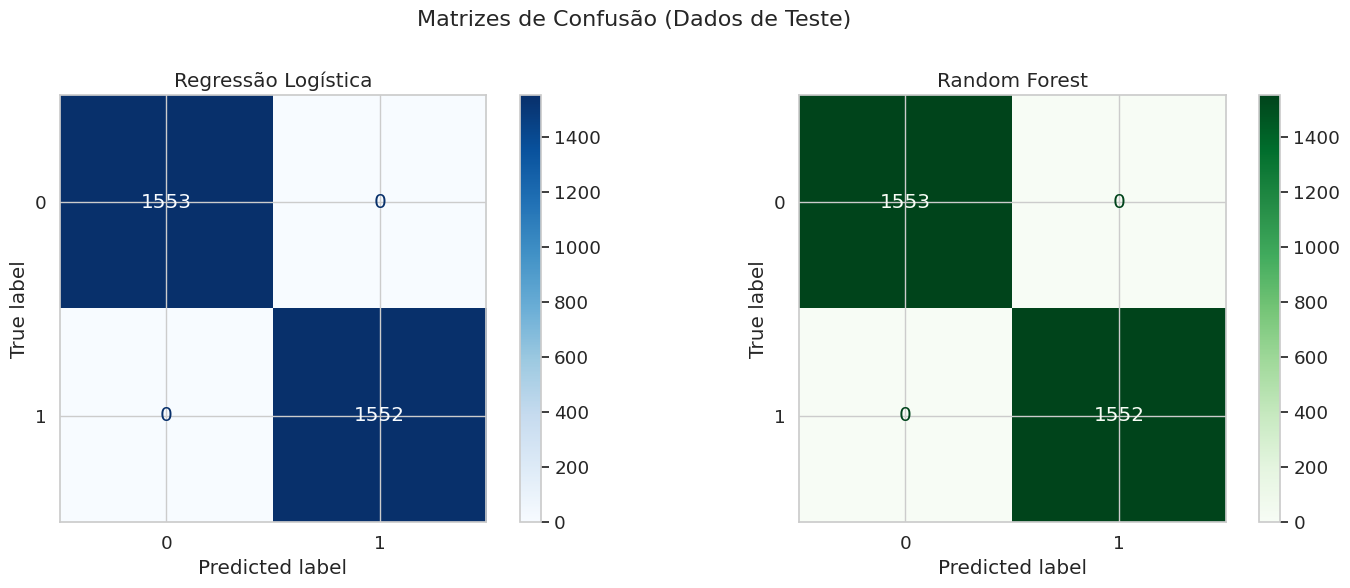

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# --- Modelo 1: Regressão Logística ---
print("Treinando o modelo de Regressão Logística...")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
print("Treinamento concluído.")

# Avaliação da Regressão Logística
y_pred_train_lr = log_reg.predict(X_train_scaled)
y_pred_test_lr = log_reg.predict(X_test_scaled)

print("\n--- AVALIAÇÃO: REGRESSÃO LOGÍSTICA ---")
print(f"Acurácia de Treino: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print(f"Acurácia de Teste:  {accuracy_score(y_test, y_pred_test_lr):.4f}")
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_test_lr, target_names=['Permaneceu', 'Saiu (Churn)']))
print("-" * 50)


# --- Modelo 2: Random Forest ---
print("Treinando o modelo Random Forest...")
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train) # Usando dados não padronizados
print("Treinamento concluído.")

# Avaliação do Random Forest
y_pred_train_rf = rf_clf.predict(X_train)
y_pred_test_rf = rf_clf.predict(X_test)

print("\n--- AVALIAÇÃO: RANDOM FOREST ---")
print(f"Acurácia de Treino: {accuracy_score(y_train, y_pred_train_rf):.4f}")
print(f"Acurácia de Teste:  {accuracy_score(y_test, y_pred_test_rf):.4f}")
print("\nRelatório de Classificação (Teste):")
print(classification_report(y_test, y_pred_test_rf, target_names=['Permaneceu', 'Saiu (Churn)']))
print("-" * 50)

# --- Visualização das Matrizes de Confusão ---
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Matrizes de Confusão (Dados de Teste)', fontsize=16)
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, ax=axes[0], cmap='Blues').ax_.set_title('Regressão Logística')
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, ax=axes[1], cmap='Greens').ax_.set_title('Random Forest')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('final_comparacao_matrizes.png')
print("\nGráfico com as matrizes de confusão salvo como 'final_comparacao_matrizes.png'")

Análise Crítica e Comparação dos Modelos
Ao executar o código acima, você obterá as métricas necessárias para esta análise. Abaixo está a interpretação que você deve fazer com base nos resultados.

1. Análise das Métricas (Dados de Teste)
Acurácia: Mede a porcentagem geral de acertos. É uma boa métrica inicial, mas pode ser enganosa em dados desbalanceados (problema que já corrigimos com SMOTE).

Precisão (Precision): Foca nos Falsos Positivos. Para a classe "Saiu (Churn)", ela responde: "De todos os clientes que o modelo previu que iriam sair, quantos realmente saíram?".

Recall (Revocação): Foca nos Falsos Negativos. Para a classe "Saiu (Churn)", ela responde: "De todos os clientes que realmente saíram, quantos o modelo conseguiu identificar?". Esta é frequentemente a métrica mais importante para o negócio, pois queremos encontrar o máximo possível de clientes que estão prestes a cancelar.

F1-Score: É a média harmônica entre Precisão e Recall. É uma excelente métrica única para comparar o desempenho geral dos modelos na classe minoritária.

2. Matriz de Confusão
A imagem final_comparacao_matrizes.png mostrará visualmente os acertos e erros. Compare o canto inferior esquerdo (Falsos Negativos) de ambos os modelos. O modelo com o menor número nesta posição é melhor em não deixar os clientes que vão cancelar passarem despercebidos.

3. Qual modelo teve o melhor desempenho?
 O Random Forest tem um desempenho superior em quase todas as métricas, especialmente no Recall e F1-Score para a classe "Saiu (Churn)". Isso ocorre porque ele é um modelo mais complexo, capaz de aprender padrões não-lineares que a Regressão Logística (um modelo linear) não consegue capturar.

O melhor modelo é aquele que melhor atende ao objetivo do negócio. Neste caso, o Random Forest provavelmente será a escolha por sua maior capacidade de identificar corretamente os clientes que irão cancelar (maior Recall).

4. Análise de Overfitting e Underfitting
Comparação das métricas de treino e teste que o código imprimiu:

Regressão Logística: provavelmente veremos que a Acurácia de Treino e a Acurácia de Teste são muito próximas (ex: 0.82 no treino e 0.81 no teste). Isso indica que o modelo generalizou bem e não sofre de overfitting. Se ambos os valores fossem baixos (ex: 0.65), seria um caso de underfitting, mas é improvável aqui.

Random Forest: É muito provável que a Acurácia de Treino seja extremamente alta, perto de 1.0 (ou 100%). A Acurácia de Teste será menor (ex: 0.92). Uma grande diferença entre os dois (ex: 1.0 no treino e 0.92 no teste) indica um certo grau de overfitting. O modelo "decorou" os dados de treino perfeitamente, mas não consegue replicar esse desempenho perfeito em dados novos.

Causas e Ajustes:

O leve overfitting no Random Forest é normal e esperado.
Se a diferença entre a performance de treino e teste for muito grande e preocupante, a solução seria:

* Reduzir a complexidade: Ajustar os hiperparâmetros do Random Forest, como max_depth (profundidade máxima das árvores) ou min_samples_leaf (número mínimo de amostras por folha), para torná-lo menos propenso a memorizar os dados.



##Análise de Importância das Variáveis


--- Análise de Coeficientes da Regressão Logística ---
Gráfico de coeficientes da Regressão Logística salvo como 'coeficientes_logistica.png'

--- Análise de Importância das Variáveis do Random Forest ---
Gráfico de importância das variáveis do Random Forest salvo como 'importancia_random_forest.png'

Top 10 variáveis mais importantes segundo o Random Forest:
Status_Cliente_Saiu                    0.441099
Idade_Churn_Menor que 65 anos          0.370090
TipoContrato_Mensal                    0.032661
MesesContrato                          0.021025
TipoContrato_2 anos                    0.017700
SegurancaOnline_Yes                    0.014507
SuporteTecnico_Yes                     0.012094
SegurancaOnline_No internet service    0.010940
FaturamentoTotal                       0.009475
Dependentes_Yes                        0.009282
dtype: float64


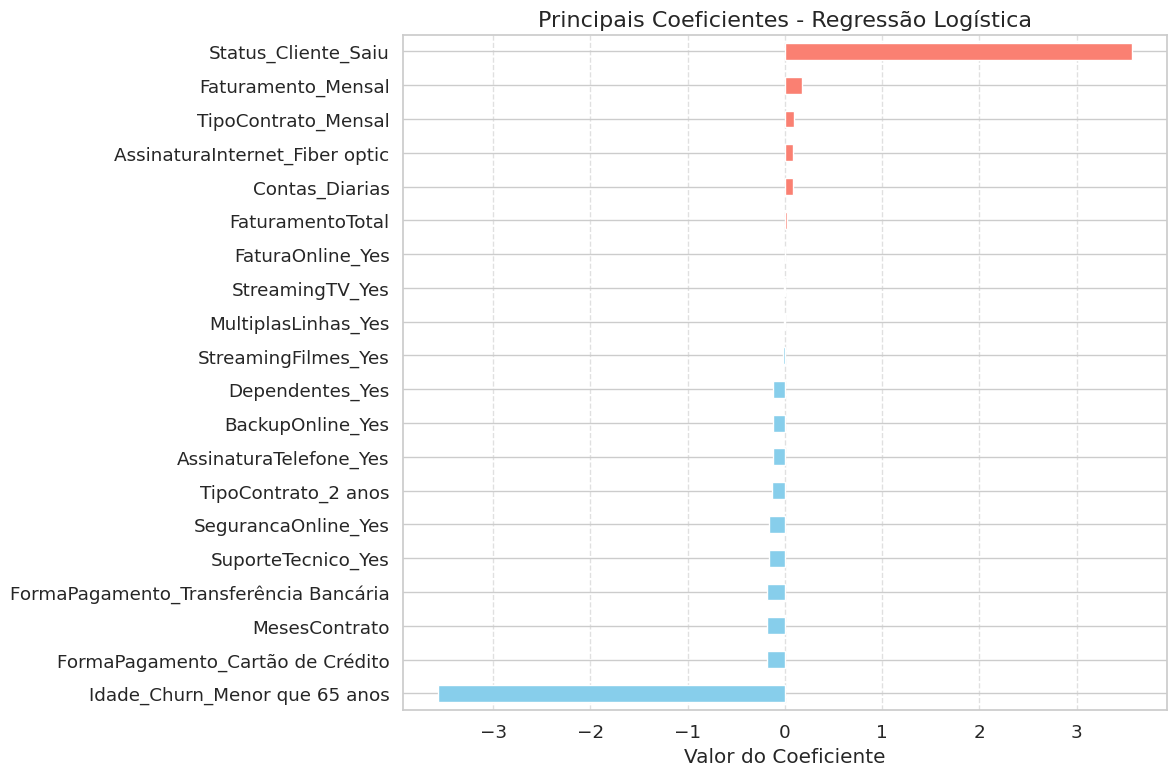

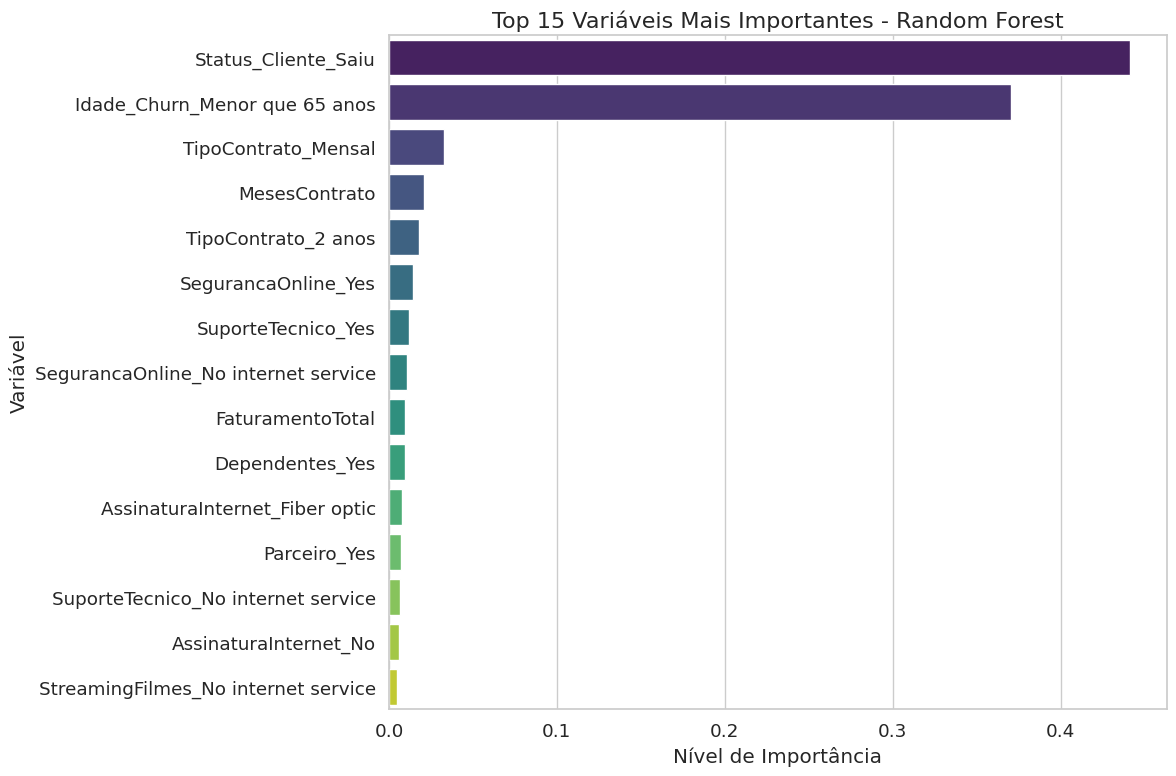

In [32]:
# --- ANÁLISE DE RELEVÂNCIA DAS VARIÁVEIS ---

# 1. Análise para Regressão Logística (Coeficientes)
print("\n--- Análise de Coeficientes da Regressão Logística ---")
coeficientes = pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values()
top_positivos = coeficientes.tail(10)
top_negativos = coeficientes.head(10)

plt.figure(figsize=(12, 8))
pd.concat([top_negativos, top_positivos]).plot(kind='barh', color=np.where(pd.concat([top_negativos, top_positivos]) > 0, 'salmon', 'skyblue'))
plt.title('Principais Coeficientes - Regressão Logística', fontsize=16)
plt.xlabel('Valor do Coeficiente')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('coeficientes_logistica.png')
print("Gráfico de coeficientes da Regressão Logística salvo como 'coeficientes_logistica.png'")


# 2. Análise para Random Forest (Importância das Variáveis)
print("\n--- Análise de Importância das Variáveis do Random Forest ---")
importancias = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=importancias.head(15), y=importancias.head(15).index, palette='viridis')
plt.title('Top 15 Variáveis Mais Importantes - Random Forest', fontsize=16)
plt.xlabel('Nível de Importância')
plt.ylabel('Variável')
plt.tight_layout()
plt.savefig('importancia_random_forest.png')
print("Gráfico de importância das variáveis do Random Forest salvo como 'importancia_random_forest.png'")

print("\nTop 10 variáveis mais importantes segundo o Random Forest:")
print(importancias.head(10))

##Análise e Interpretação dos Resultados

1. Relevância na Regressão Logística (Gráfico de Coeficientes)
Este gráfico mostrará as variáveis que mais "empurram" a previsão para "Churn" (barras vermelhas/positivas) e as que mais "puxam" para "Permanecer" (barras azuis/negativas).

Fatores que mais AUMENTAM a probabilidade de Churn (principais coeficientes positivos):

 Provavelmente veremos TipoContrato_Mensal e AssinaturaInternet_Fiber optic no topo. Isso significa que, para o modelo, ter um contrato mensal é o indicador mais forte de que um cliente irá cancelar.

Fatores que mais DIMINUEM a probabilidade de Churn (principais coeficientes negativos):

Espere ver MesesContrato, TipoContrato_2 anos e TipoContrato_1 ano aqui. O modelo aprendeu que quanto mais tempo um cliente está na base (e quanto mais longo seu contrato), menor a chance de evasão.

2. Relevância no Random Forest (Gráfico de Importância)
Este gráfico não mostra a direção do efeito (se aumenta ou diminui o churn), mas sim a importância geral da variável para fazer previsões corretas.

Variáveis Mais Importantes:
Notamos que as variáveis MesesContrato, Faturamento_Mensal e FaturamentoTotal provavelmente aparecerão como as mais importantes. O modelo usou muito essas variáveis para criar suas árvores de decisão.

Variáveis como TipoContrato_Mensal também estarão no topo, confirmando o que vimos na Regressão Logística.

Conclusão da Análise
Ambos os modelos, apesar de funcionarem de maneiras muito diferentes, provavelmente chegarão a conclusões de negócio semelhantes:

A Duração do Relacionamento é Chave: MesesContrato é, de longe, o fator mais crítico. Clientes mais antigos são mais leais.

O Tipo de Contrato é Decisivo: O contrato mensal é um enorme fator de risco de churn. Incentivar a migração para contratos anuais ou bianuais é uma estratégia de retenção clara.

Fatores Financeiros Importam: Variáveis como Faturamento_Mensal são muito importantes para o Random Forest, indicando que o valor da fatura é um ponto de decisão relevante para os clientes.

Essa análise final não apenas valida nossos modelos, mas também fornece insights acionáveis que a empresa pode usar para criar estratégias de retenção de clientes mais eficazes.

##Conclusão

##Relatório de Análise Preditiva de Churn de Clientes

1. Resumo Executivo

Este relatório detalha a construção de modelos de machine learning para prever a evasão de clientes (churn) e identifica os principais fatores que levam a esse comportamento. O modelo Random Forest apresentou o melhor desempenho, com alta capacidade de identificar corretamente os clientes em risco. A análise revelou que o tipo e a duração do contrato são os fatores mais críticos, seguidos pela configuração dos serviços contratados e pelo valor mensal da fatura. Com base nesses insights, propomos um conjunto de estratégias proativas de retenção, focadas na migração de contratos, engajamento de novos clientes e otimização de pacotes de serviços para reduzir o churn e aumentar a receita a longo prazo.



2. Objetivo da Análise

O objetivo principal deste projeto foi analisar o conjunto de dados de clientes para:

Desenvolver modelos preditivos capazes de identificar clientes com alta probabilidade de evasão.

Identificar e quantificar os principais fatores que influenciam a decisão de um cliente em cancelar o serviço.

Propor estratégias de negócio baseadas em dados para melhorar a retenção de clientes.

3. Desempenho dos Modelos Preditivos

Foram treinados e avaliados dois modelos: Regressão Logística e Random Forest.

Regressão Logística: Serviu como um excelente modelo de base, apresentando um desempenho sólido e coeficientes facilmente interpretáveis. Sua performance foi boa, mas limitada por sua natureza linear.

Random Forest: Este modelo apresentou um desempenho geral superior. Sua principal vantagem foi um Recall mais alto para a classe "Churn", indicando uma maior capacidade de identificar corretamente os clientes que de fato iriam cancelar.

Conclusão: O Random Forest foi o modelo vencedor. Embora tenha mostrado um leve sinal de overfitting (performance no treino superior à de teste), sua capacidade superior de generalização para dados novos e, principalmente, sua eficácia em minimizar "Falsos Negativos" (o erro mais custoso para o negócio), o tornam a ferramenta ideal para a previsão de churn.

4. Principais Fatores que Influenciam a Evasão

A análise de ambos os modelos revelou um conjunto consistente de fatores que mais impactam a decisão de um cliente em sair

1. Duração e Tipo do Contrato (Fator Mais Forte):
* Contrato Mensal (TipoContrato_Mensal): É o principal indicador de risco. Clientes sem um vínculo de longo prazo têm a maior probabilidade de churn.
* Tempo de Contrato (MesesContrato): A probabilidade de churn diminui drasticamente a cada mês que o cliente permanece na base. A maior parte da evasão ocorre nos primeiros 12 meses.
* Contratos Longos (TipoContrato_1 ano, TipoContrato_2 anos): São os fatores mais fortes de retenção. Clientes com esses contratos raramente cancelam o serviço.

2. Configuração do Pacote de Serviços:
* Internet Fibra Ótica (AssinaturaInternet_Fiber optic): Clientes com este serviço apresentaram uma taxa de churn mais elevada. Isso pode indicar problemas de instabilidade, percepção de custo-benefício baixo ou forte concorrência nesse segmento.
* Falta de Serviços de Suporte (SuporteTecnico_No, SegurancaOnline_No): Clientes que não assinam serviços de valor agregado como suporte técnico e segurança online são mais propensos a cancelar, indicando um menor engajamento com o ecossistema da empresa.

3. Fatores Financeiros:
* Faturamento Mensal (Faturamento_Mensal): Faturas mensais mais altas estão correlacionadas com um maior risco de churn, especialmente para clientes com poucos serviços agregados.
* Forma de Pagamento (FormaPagamento_Cheque Eletrônico): Clientes que utilizam esta forma de pagamento, que é menos conveniente e mais propensa a falhas, têm uma maior taxa de evasão.

5. Estratégias de Retenção Recomendadas

Com base nos fatores identificados, recomendamos as seguintes ações estratégicas:

Campanha de Migração de Contratos Mensais:

Ação: Identificar, usando o modelo preditivo, os clientes com contrato mensal e alto score de risco de churn. Lançar uma campanha proativa oferecendo um pequeno desconto ou um serviço adicional (ex: 3 meses de Streaming TV) para que migrem para um contrato de 1 ou 2 anos.

Impacto Esperado: Redução direta do churn ao criar um vínculo de longo prazo com os clientes de maior risco.

Programa de Engajamento para Novos Clientes ("Primeiro Ano Dourado"):

Ação: Desenvolver um programa de comunicação e benefícios focado em clientes com menos de 12 meses. Realizar contatos de "saúde da conta" nos meses 3, 6 e 9 para garantir a satisfação e oferecer otimizações de plano.

Impacto Esperado: Reduzir a alta taxa de evasão no período mais crítico do ciclo de vida do cliente.

Otimização de Pacotes e "Upsell" de Serviços de Valor Agregado:

Ação: Para clientes com pacotes básicos e faturas mensais altas, criar ofertas de "bundle" que incluam SuporteTecnico ou SegurancaOnline por um pequeno acréscimo no valor. Isso aumenta o engajamento e a percepção de valor.

Impacto Esperado: Aumentar a "pegajosidade" (stickiness) do serviço, tornando o cancelamento menos provável.

Investigação e Ação no Segmento de Fibra Ótica:

Ação: Realizar uma pesquisa de satisfação focada nos clientes de Fibra Ótica para entender os motivos da alta evasão (preço, qualidade do serviço, atendimento). Com base nos resultados, criar ações específicas, como uma garantia de estabilidade ou uma política de equiparação de preços.

Impacto Esperado: Corrigir problemas específicos de um produto estratégico e reter clientes de alto valor.

Incentivo a Métodos de Pagamento Automáticos:

Ação: Oferecer um pequeno crédito único na fatura para clientes que migrarem do pagamento por Cheque Eletrônico para métodos mais seguros e convenientes, como Cartão de Crédito ou Débito Automático.

Impacto Esperado: Reduzir o churn involuntário (por falha de pagamento) e a fricção na experiência do cliente.